In [1]:
import numpy as np
import os
#Visualizations
import matplotlib.pyplot as plt
import random
from datetime import datetime
import itertools

import swnHeatKernels as swnN 
from scipy import linalg
import helperFunc as hf
import swnMetrics as swn
import centrality as ce
import distributions as dstr

from matplotlib.ticker import PercentFormatter


## Functions

In [2]:
def plotVarSlicesNormalVsLognormal(dictVars, dictTaus,pRand,yLabel,yLim,filePath = False, derivFlag = False):

    weightDist = ['normal','lognormal']
    dictMean = {}
    dictStd = {}
    
    ratio = 1
    xLabel = 'tau'
    
    colorsPlot = [ 'orange', 'green']
    shapePoint = ['-s','-o']
    shapePointNoLine = ['s','o']

    plt.rcParams['figure.figsize'] = [15, 6]
    fig = plt.figure()
    for count,p in enumerate(pRand):
        for ind, wD in enumerate(weightDist):
        

            if ind == 0:
                ax = fig.add_subplot(1, len(weightDist), count + 1)
                plt.xlabel(xLabel)
                
                ttl = 'pRand = '+str(p)
                plt.title(ttl)

                #plt.xticks(parameterVaried[0::2], parameterVaried[0::2])
                # plt.ylim(ylimit)
                plt.ylim(yLim)
                plt.ylabel(yLabel)


            ax.set_aspect(1.0 / ax.get_data_ratio() * ratio)
            varSlice = dictVars[wD][count, :, :]

            varStd = np.std(varSlice, axis=1)
            varSE = varStd / (np.sqrt(varSlice.shape[1]))
            varMean = np.mean(varSlice, axis=1)
            
            if derivFlag == False:
                ax.errorbar(dictTaus[wD], varMean, varStd, mfc=colorsPlot[ind], mec=colorsPlot[ind], fmt=shapePoint[ind], color=colorsPlot[ind], label=wD)
            elif derivFlag == True:
                #print(taus[wD][2:-1].shape)
                #print(varMean[2:-1].shape)
                ax.errorbar(dictTaus[wD][3:-1], varMean[2:-1], varStd[2:-1], mfc=colorsPlot[ind], mec=colorsPlot[ind], fmt=shapePoint[ind], color=colorsPlot[ind], label='pRand = '+str(p))
            
                
            if count == 0 and ind == 1:
                ax.legend(loc='upper right')
            
            if derivFlag == False:
                dictMean[(wD,p)] = varMean
                dictStd[(wD,p)] = varStd
            elif derivFlag == True:
                dictMean[(wD,p)] = varMean[2:-1]
                dictStd[(wD,p)] = varStd[2:-1]      
                
                
    if filePath is not False:
        directory = os.path.dirname(filePath)
        if not os.path.exists(directory):  # makes the directory if it does not exist
            os.makedirs(directory)
        plt.savefig(filePath, format='eps', dpi=1200)              
           
    return dictMean,dictStd,dictTaus

## Load data and plot parts of Figure 3

In [3]:
#Load data
loadAddressOutliers = 'data/degreesStrengths/outliers.pckl'
(dictPrpOutliersDeg, dictPrpOutliersStrength, pRand,taus,factor) = hf.loadVar(loadAddressOutliers)

loadAddressHist = 'data/degreesStrengths/histDegStr.pckl'
(degCentra,strCentra,centraTau,degMod,strMod,modTau)= hf.loadVar(loadAddressHist)

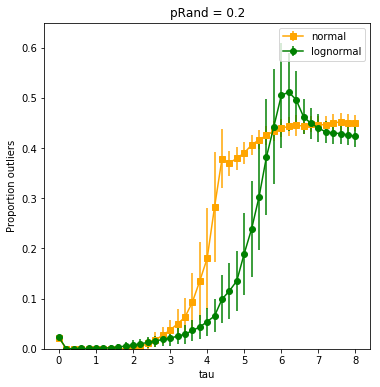

In [4]:
p = [0.2]
dictQMean,dictQStd,tausAll = plotVarSlicesNormalVsLognormal(dictPrpOutliersDeg, taus,p,'Proportion outliers',(0,0.65))

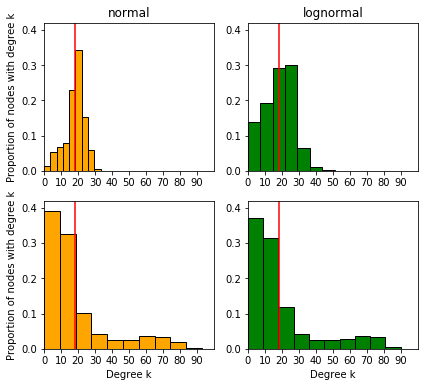

In [5]:

ystep = 0.1
ylim = [0,0.42]
xstep = 10
xlim = [0,100]
color = ['orange','green']
    
plt.rcParams['figure.figsize'] = [14, 6]

yticks = np.arange(ylim[0],ylim[1],ystep)
xticks = np.arange(xlim[0],xlim[1],xstep)
lenAll = len(degMod)
for it, wD in enumerate(degMod):
    
    plt.subplot(2, 2*lenAll, it+1)
    meanD = np.mean(degMod[wD])
    plt.hist(degMod[wD],bins = 10, weights=np.ones(len(degMod[wD])) / len(degMod[wD]),color = color[it],edgecolor='black', linewidth=1)
    
    plt.plot([meanD,meanD],ylim,'red')
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.yticks(yticks), plt.xticks(xticks)
    plt.title(wD) 
    if it == 0:
        plt.ylabel('Proportion of nodes with degree k')

    
    plt.subplot(2, 2*lenAll, 2*lenAll+it+1)
    meanD = np.mean(degCentra[wD])
    plt.plot([meanD,meanD],ylim,'red')
    plt.hist(degCentra[wD],bins = 10,weights=np.ones(len(degCentra[wD])) / len(degCentra[wD]),color = color[it],edgecolor='black', linewidth=1)    

    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.yticks(yticks), plt.xticks(xticks)
    if it == 0:
        plt.ylabel('Proportion of nodes with degree k')
    plt.xlabel('Degree k')


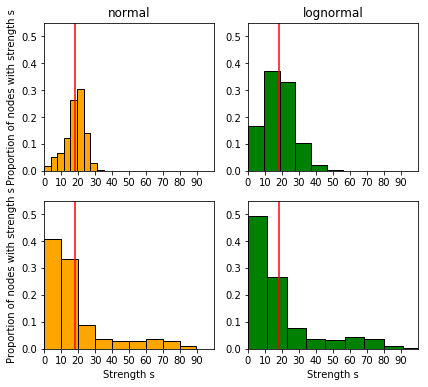

In [6]:
ystep = 0.1
ylim = [0,0.55]
xstep = 10
xlim = [0,100]
color = ['orange','green']
    
plt.rcParams['figure.figsize'] = [14, 6]

yticks = np.arange(ylim[0],ylim[1],ystep)
xticks = np.arange(xlim[0],xlim[1],xstep)
lenAll = len(strMod)
for it, wD in enumerate(strMod):
    
    plt.subplot(2, 2*lenAll, it+1)
    meanD = np.mean(strMod[wD])
    plt.hist(strMod[wD],bins = 10, weights=np.ones(len(strMod[wD])) / len(strMod[wD]),color = color[it],edgecolor='black', linewidth=1)
    
    plt.plot([meanD,meanD],ylim,'red')
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.yticks(yticks), plt.xticks(xticks)
    plt.title(wD)    
    if it == 0:
        plt.ylabel('Proportion of nodes with strength s')
    
    plt.subplot(2, 2*lenAll, 2*lenAll+it+1)
    meanD = np.mean(strCentra[wD])
    plt.plot([meanD,meanD],ylim,'red')
    plt.hist(strCentra[wD],bins = 10,weights=np.ones(len(strCentra[wD])) / len(strCentra[wD]),color = color[it],edgecolor='black', linewidth=1)    

    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.yticks(yticks), plt.xticks(xticks)
    if it == 0:
        plt.ylabel('Proportion of nodes with strength s')
    plt.xlabel('Strength s')

    